# Project : FoodHub Data Analysis

* **Exploratory Data Analysis**
  - Univariate Analysis
  - Multivariate Analysis
  - Business Recommendations

### **Context**

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### **Objective**

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### **Data Description**

The data contains the different data related to a food order. The detailed data dictionary is given below.

### **Data Dictionary**

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Suppress All Warnings Globally
import warnings
warnings.filterwarnings("ignore")

# Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('/kaggle/input/food-ordering-and-delivery-app-dataset/food_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

**The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.**

---



In [3]:
# Finding the shape of the dataframe
df.shape

(1898, 9)

#### Observations:
**The Dataframe consists of 1898 rows and 9 columns**

---




In [4]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

There are 1898 non-null values in each column. order_id, customer_id, food_preparation time and delivery time contains integer values. resturant_name, cuisine_type, day_of_the_week, rating contains categorical value which is referred as object type. The value in cost_of_the_order is of the float type.

**In summary, four columns have integer type values, four columns contain object type values, and one column has float type values.**

---




In [5]:
# Checking missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

**There are no missing values in the dataset**

---




In [6]:
# Finding statistical summary and rounding to two decimal points
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.0,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.0,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.0,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.0,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:

* **We obtained a statistical summary for each numeric column (int and float).**

* **The minimum , average, and maximum time it takes for food to be prepared once an order is placed are respectively 20.00, 27.37 and 35.00 (assuming all times are in minutes).**

---




In [7]:
# Checking value counts for each unique value of the 'rating' column
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:
There are four unique values in rating column: Not given, 5, 4, 3

**Out of 1898, 736 orders are not rated.**

---




### Exploratory Data Analysis (EDA)

# Univariate Analysis

**Order ID**

In [8]:
#ckecking unique order ID
print('Number of unique ID in the order_id column is', df['order_id'].nunique())

Number of unique ID in the order_id column is 1898


* **There are no duplicate order ID.**

**Customer ID**

In [9]:
# checking unique customer ID
print('Number of unique ID in the customer_id column is', df['customer_id'].nunique())

Number of unique ID in the customer_id column is 1200


* **The 1898 orders come from 1200 different consumers.**

**Restaurant name**

In [10]:
# checking unique Restaurant Name
print('Number of unique names in the restaurant_name column is', df['restaurant_name'].nunique())

Number of unique names in the restaurant_name column is 178


* **We identified 178 different restaurants from which individuals order.**

**Cuisine type**

In [11]:
# Check unique cuisine type
print('Number of unique values in the cuisine_type column is', df['cuisine_type'].nunique())

Number of unique values in the cuisine_type column is 14


In [12]:
# Finding top five cuisine types
print('Top five cuisine types are\n',df['cuisine_type'].value_counts().head(5))

Top five cuisine types are
 cuisine_type
American    584
Japanese    470
Italian     298
Chinese     215
Mexican      77
Name: count, dtype: int64


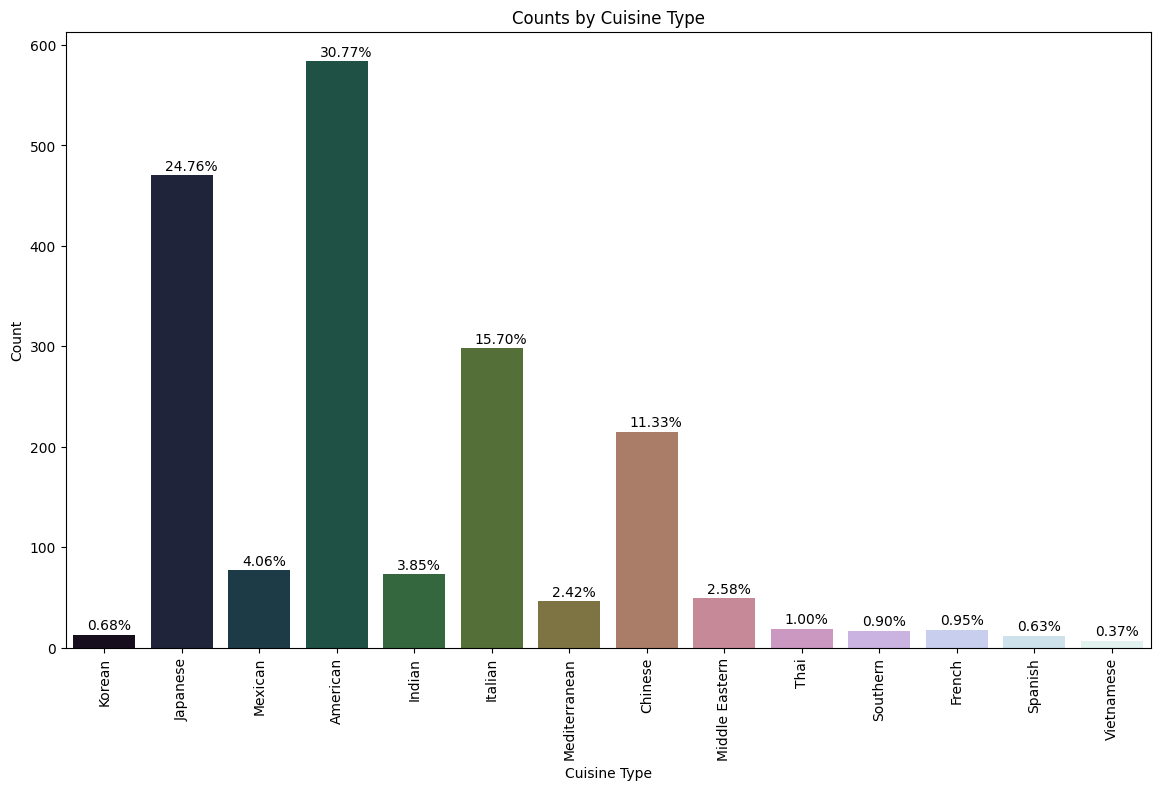

In [13]:
# Setting up the figure size
plt.figure(figsize=(14, 8))

# Creating a countplot to visualize the counts of each cuisine type
ax = sns.countplot(data=df, x='cuisine_type', palette = 'cubehelix')

total = float(len(df))  # Calculating the total number of records in the DataFrame

# Looping through the bars in the countplot to add percentage labels
for p in ax.patches:
    percentage = '{:.2f}%'.format((p.get_height() / total) * 100)  # Calculate the percentage
    x = p.get_x() + p.get_width() / 2 - 0.22  # Calculate x-coordinate for label placement
    y = p.get_height() + 5  # Calculate y-coordinate for label placement
    ax.annotate(percentage, (x, y))  # Add the percentage label to the bar

# Setting the x-axis label
plt.xlabel('Cuisine Type')

# Setting the y-axis label
plt.ylabel('Count')

# Setting the title of the plot
plt.title('Counts by Cuisine Type')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

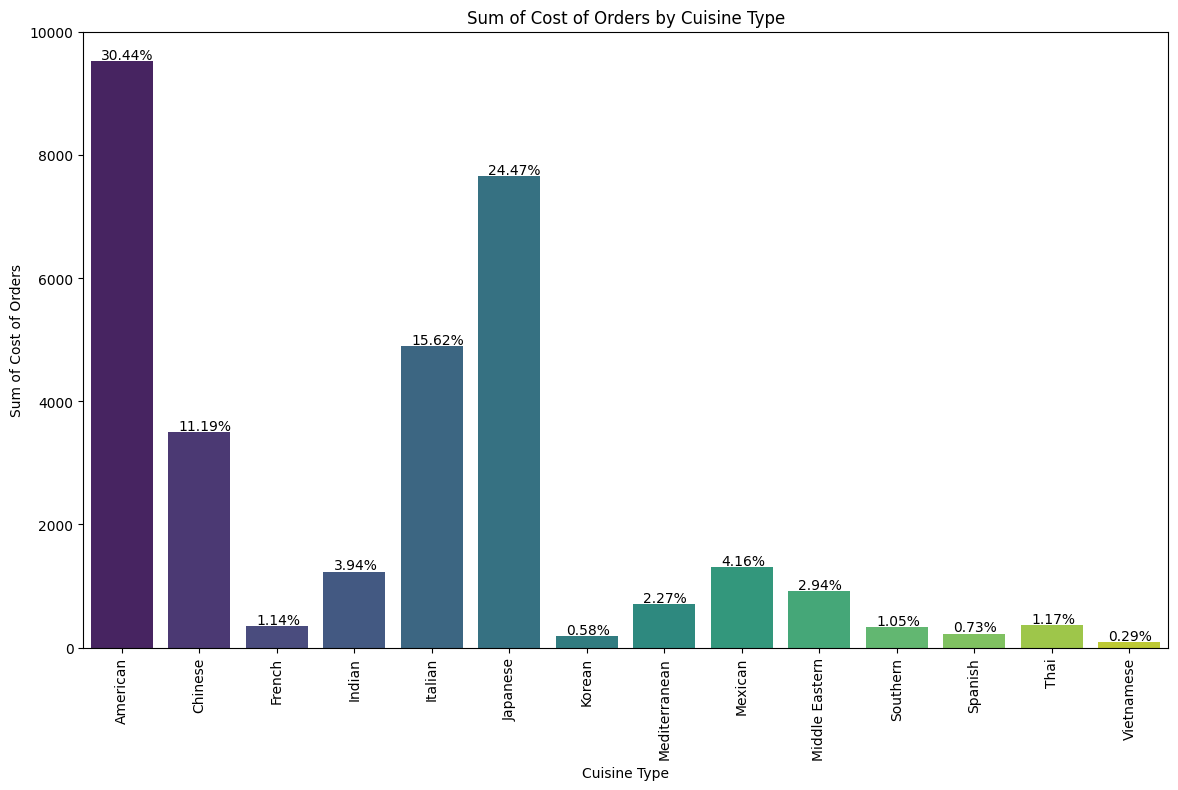

In [14]:
# Calculating the sum of cost of orders for each cuisine type
sum_of_costs = df.groupby('cuisine_type')['cost_of_the_order'].sum().reset_index()

# Setting up the figure size
plt.figure(figsize=(14, 8))

# Creating the bar plot
ax = sns.barplot(data=sum_of_costs, x='cuisine_type', y='cost_of_the_order', palette='viridis')


total_cost = float(df['cost_of_the_order'].sum())

# Looping through the bars in the countplot to add percentage labels
for p in ax.patches:
    percentage = '{:.2f}%'.format((p.get_height() / total_cost) * 100)
    x = p.get_x() + p.get_width() / 2 - 0.27
    y = p.get_height() + 30
    ax.annotate(percentage, (x, y))
    # Customizing plot labels and rotation for better readability
    plt.xlabel('Cuisine Type')
    plt.ylabel('Sum of Cost of Orders')
    plt.title('Sum of Cost of Orders by Cuisine Type')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

* **There are 14 different types of cuisine.**
* **American cuisines have the most orders and revenue, followed by Japanese, Italian, and Chinese cuisines, among others.**

**Cost of the order**

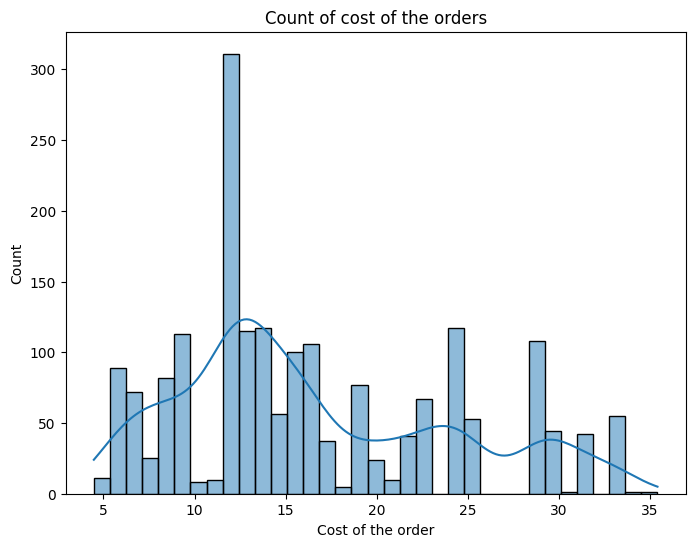

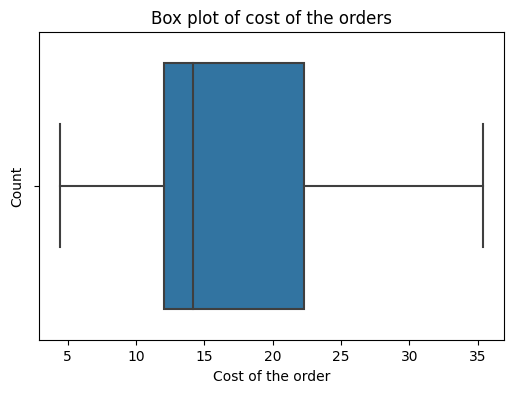

In [15]:
plt.figure(figsize= (8,6)) #setting up figure size

## Plotting histogram for the cost of order
sns.histplot(data=df,bins = 35, x='cost_of_the_order', kde = True)
plt.xlabel('Cost of the order')
plt.ylabel('Count')
plt.title('Count of cost of the orders')
plt.show()

## Boxplot for the cost of order
plt.figure(figsize= (6,4))

sns.boxplot(data=df,x='cost_of_the_order', showfliers = True)
plt.xlabel('Cost of the order')
plt.ylabel('Count')
plt.title('Box plot of cost of the orders')
plt.show()

* **The distribution for cost of the orders are skewed towards right and it is multimodal**
* **There are no outliers in this feature column**


**Day of the week**

In [16]:
#Checking unique values

print('Number of unique ID in the day_of_the_week column is', df['day_of_the_week'].nunique())

Number of unique ID in the day_of_the_week column is 2


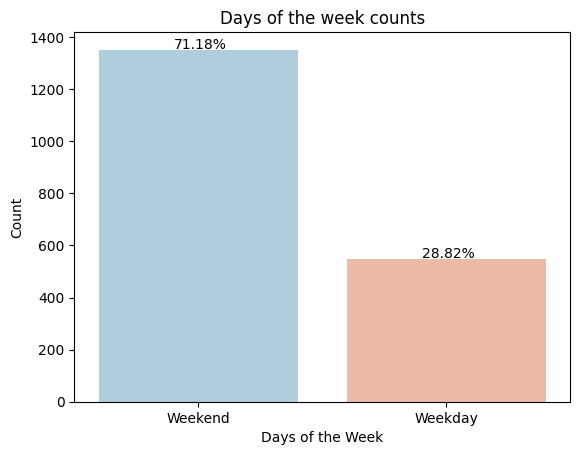

In [17]:
## Plotting barplot for days of the week
ax = sns.countplot(data = df, x = 'day_of_the_week', palette='RdBu_r')

#Find percentage and plot them
total = float(len(df))
for p in ax.patches:
    percentage = '{:.2f}%'.format((p.get_height() / total) * 100)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y))
plt.xlabel('Days of the Week')
plt.ylabel('Count')
plt.title('Days of the week counts')
plt.show()

* **On weekends, customers place more orders than on weekdays.**

**Rating**

In [18]:
#checking unique values

print('Number of unique value in the rating column is', df['rating'].nunique())

Number of unique value in the rating column is 4


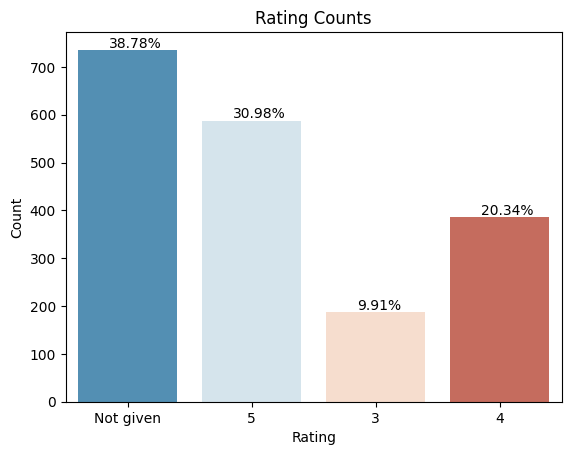

In [19]:
# Plotting Count Plot with percentages

ax = sns.countplot(data = df, x = 'rating', palette='RdBu_r')

total = float(len(df))

# Looping through the bars in the countplot to add percentage labels
for p in ax.patches:
    percentage = '{:.2f}%'.format((p.get_height() / total) * 100)  # Calculating the percentage and format it with two decimal places
    # Calculating the x and y coordinates for label placement
    x = p.get_x() + p.get_width() / 2 - 0.15
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y))
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Counts')
plt.show()

* **The majority of customares (38.78%) did not provide rating. 30.98% customers given a 5-star rating, followed by 9.91% and 20.34% for 3 and 4 stars, respectively.**

**Food Preparation time**

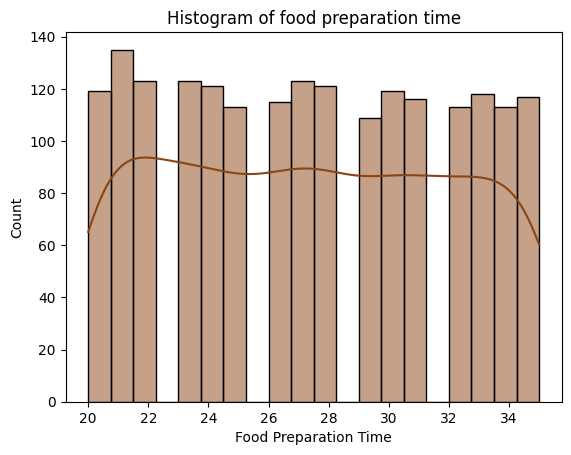

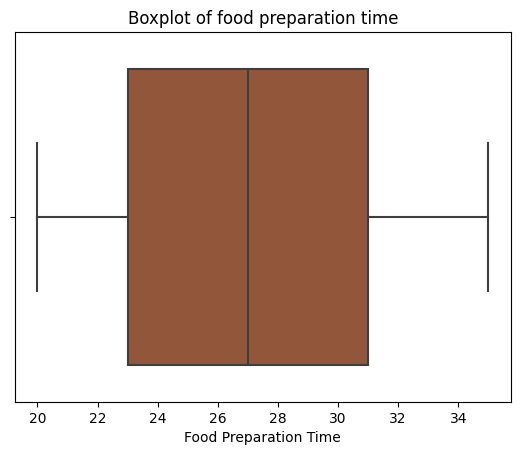

In [20]:
# Plotting histogram with KDE
sns.histplot(data=df,bins = 20,x='food_preparation_time', kde= True , color = 'saddlebrown')
plt.xlabel('Food Preparation Time')
plt.ylabel('Count')
plt.title('Histogram of food preparation time')
plt.show()

# Plotting boxplot with ouliers
sns.boxplot(data=df,x='food_preparation_time', showfliers = True, color = 'sienna')
plt.xlabel('Food Preparation Time')
plt.title('Boxplot of food preparation time')
plt.show()

* **The distribution of the food preparation time is roughly uniform.**
* **The data is not skewed and has no outliers**

**Delivery time**

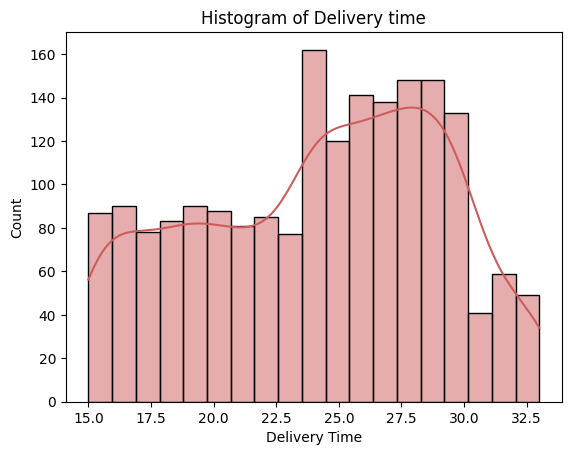

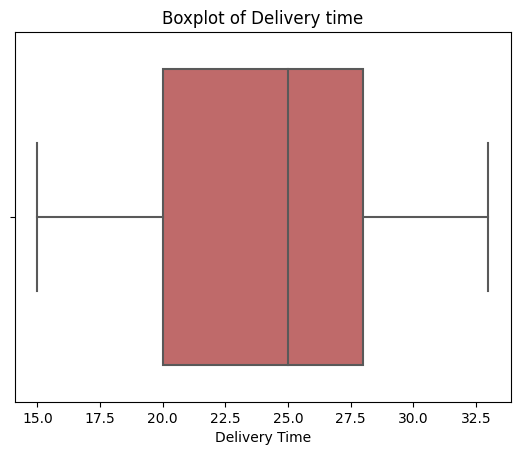

In [21]:
# Plotting histogram with KDE
sns.histplot(data=df,bins =19, x='delivery_time', kde = True, color = 'indianred')
plt.xlabel('Delivery Time')
plt.ylabel('Count')
plt.title('Histogram of Delivery time')
plt.show()

# Plotting boxplot with ouliers
sns.boxplot(data=df,x='delivery_time', showfliers = True, color = 'indianred')
plt.xlabel('Delivery Time')
plt.title('Boxplot of Delivery time')
plt.show()

* **The delivery time column distribution is skewed to the left**
* **This column has no outliers.**

In [22]:
# checking value counts for top 5 resturants

top_restaurants = df['restaurant_name'].value_counts().head(5)
print(top_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


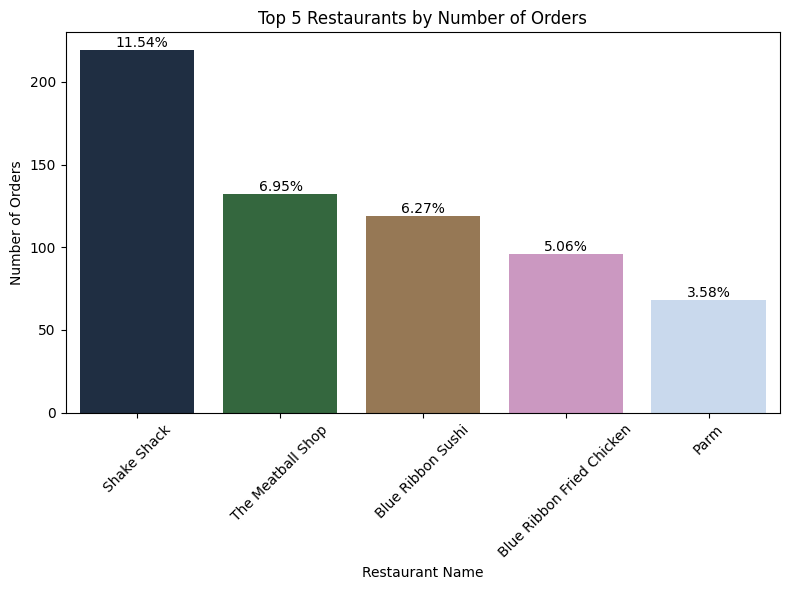

In [23]:
# Setting up the figure size
plt.figure(figsize=(8, 6))

# Creating a bar plot to show the number of orders for the top 5 restaurants
ax = sns.barplot(x=top_restaurants.index, y=top_restaurants.values, palette = 'cubehelix')

#plotting percentages
total = float(len(df))
for p in ax.patches:
    percentage = '{:.2f}%'.format((p.get_height() / total) * 100)
    x = p.get_x() + p.get_width() / 2 - 0.15
    y = p.get_height() + 2
    ax.annotate(percentage, (x, y))

# Customizing plot labels and rotation for better readability
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.title('Top 5 Restaurants by Number of Orders')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Ensure tight layout to prevent label cutoff
plt.show()

#### Observations:

**The top five restaurants in terms of orders received are as follows:**
* Shake Shack received 219 orders (11.54%).
* The Meatball Shop has received 132 orders (6.95%).
* Blue Ribbon Sushi has received 119 orders (6.27%).
* Blue Ribbon Fried Chicken has received 96 orders (5.06%).
* Parm has received 68 orders (3.58%).

---



In [24]:
# Fetching the dataframe only with weekend value in the day_of _the_week column
df_weekend = df[df['day_of_the_week'] == 'Weekend' ]

#Counting cuisine type values from the fetched dataframe
df_weekend['cuisine_type'].value_counts()

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

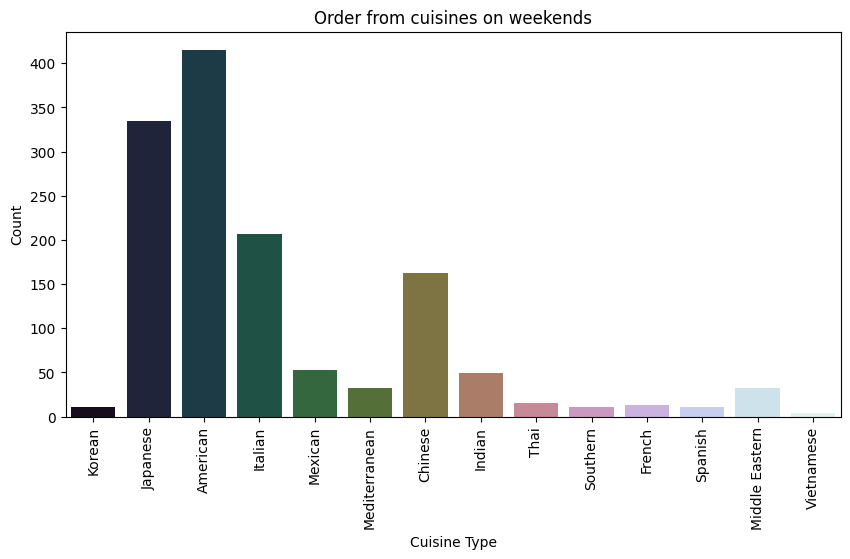

In [25]:
# Setting up figure size of the plot
plt.figure(figsize=(10, 5))  # Set the size of the plot figure (width: 10 units, height: 5 units)

# Visualizing with seaborn
sns.countplot(data=df_weekend, x='cuisine_type', palette = 'cubehelix')  # Creating a countplot using Seaborn
plt.xlabel('Cuisine Type')  # Setting the label for the x-axis
plt.ylabel('Count')
plt.title('Order from cuisines on weekends')
plt.xticks(rotation=90)  # Rotating the x-axis labels by 90 degrees for better readability

plt.show()  # Display the plot

#### Observations:

**On weekends, American cuisine is the most popular, followed by Japanese, Italian, Chinese, and others.**


---



In [26]:
# Getting orders that cost above 20 dollars
df_more_than_20 = df[df['cost_of_the_order'] > 20]

# Calculating the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', len(df_more_than_20))

# Calculating percentage
percentage = (len(df_more_than_20) / len(df)) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


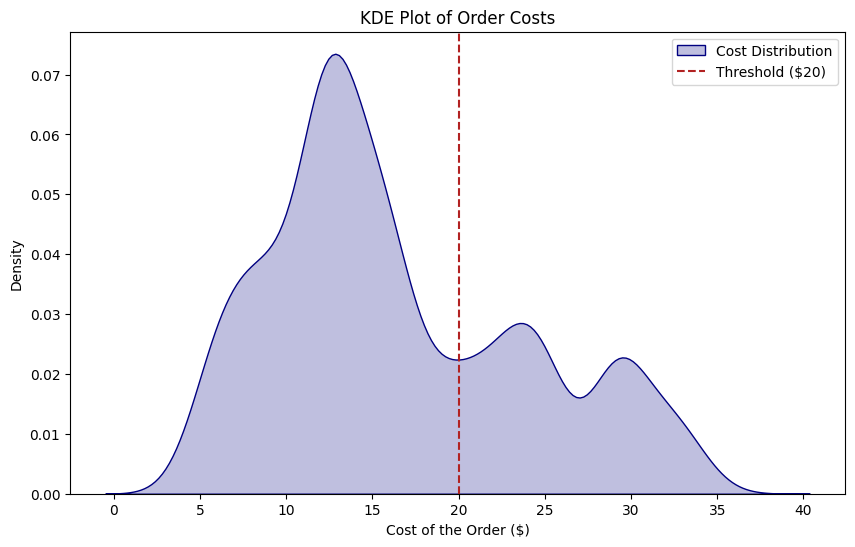

In [27]:
# Create a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='cost_of_the_order', fill=True, color='navy', label='Cost Distribution')
plt.xlabel('Cost of the Order ($)')
plt.ylabel('Density')
plt.title('KDE Plot of Order Costs')
plt.legend()
plt.axvline(x=20, color='firebrick', linestyle='--', label='Threshold ($20)')  # Add a vertical line at $20

plt.legend()
plt.show()

#### Observations:

**The percentage of orders over $20 is 29.24%.**

---




In [28]:
# Finding mean of the delivery time with the built-in mean fuction

print('Mean delivery time of orders is' ,df['delivery_time'].mean().round(2), 'minutes')

Mean delivery time of orders is 24.16 minutes


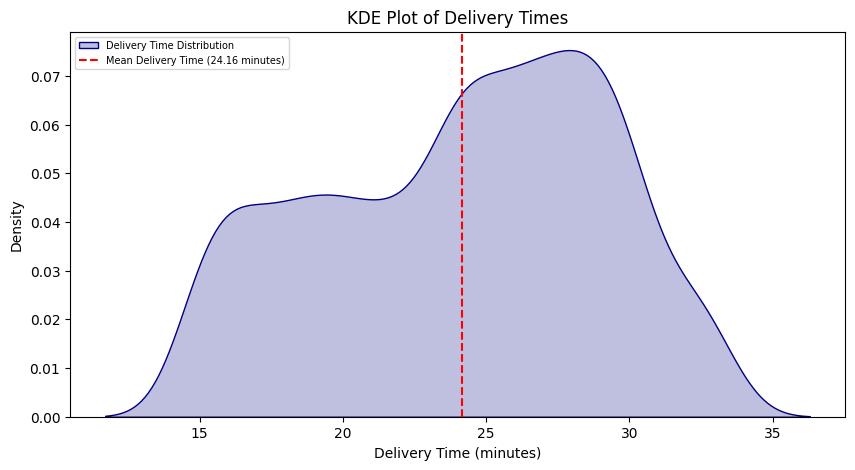

In [29]:
plt.figure(figsize=(10, 5))  # Set the figure size

# Plot the KDE
sns.kdeplot(data=df, x='delivery_time', fill=True, color='navy', label='Delivery Time Distribution')

# Calculate the mean delivery time
mean_delivery_time = df['delivery_time'].mean()

# Add a vertical line at the mean
plt.axvline(x=mean_delivery_time, color='red', linestyle='--', label=f'Mean Delivery Time ({mean_delivery_time:.2f} minutes)')

# Set labels and title
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Density')
plt.title('KDE Plot of Delivery Times')

# Add a legend
plt.legend(loc='upper left', prop={'size': 7})

# Show the plot
plt.show()

#### Observations:

**The average order delivery time is 24.16 minutes.**

---




In [30]:
# Finding top 5 frequent customers with the number of orders they placed
top_three_customers = df['customer_id'].value_counts().head(5)
print(top_three_customers)

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
Name: count, dtype: int64


#### Observations:

**ID 52832, 47440, and 83287 are the top three most frequent clients, with 13, 10, and 9 orders, respectively.**

---




# **Multivariate Analysis**

**Cuisine vs Cost of the order**

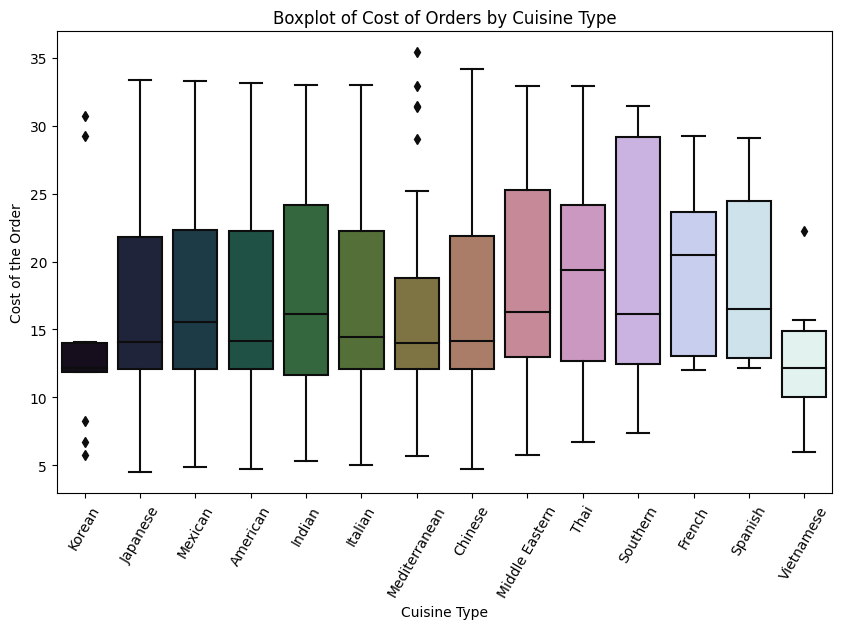

In [31]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(10,6))

# Create a boxplot showing the relationship between cuisine_type and cost_of_the_order
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'cubehelix')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.xticks(rotation = 60)
plt.title('Boxplot of Cost of Orders by Cuisine Type')

# Display the plot
plt.show()

In [32]:
# checking mean and median of the costs for cuisine types
print(df.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values(ascending=False).round(2))
print(df.groupby('cuisine_type')['cost_of_the_order'].median().sort_values(ascending=False).round(2))

cuisine_type
French            19.79
Southern          19.30
Thai              19.21
Spanish           18.99
Middle Eastern    18.82
Mexican           16.93
Indian            16.92
Italian           16.42
American          16.32
Chinese           16.31
Japanese          16.30
Mediterranean     15.47
Korean            14.00
Vietnamese        12.88
Name: cost_of_the_order, dtype: float64
cuisine_type
French            20.47
Thai              19.35
Spanish           16.52
Middle Eastern    16.30
Indian            16.15
Southern          16.11
Mexican           15.57
Italian           14.48
American          14.12
Chinese           14.12
Japanese          14.07
Mediterranean     14.00
Korean            12.18
Vietnamese        12.13
Name: cost_of_the_order, dtype: float64


* **The top five cuisine types with the highest costs on average are French, Southern, Thai, Spanish, and Middle Eastern. Additionally, this cuisines lead the list in terms of median**

* **Italian, American, Chinese, and Japanese items, which sold the most units, are at the bottom area of the list in terms of costs (8, 9, 10, and 11, respectively).**

---



**Cuisine vs Food Preparation time**

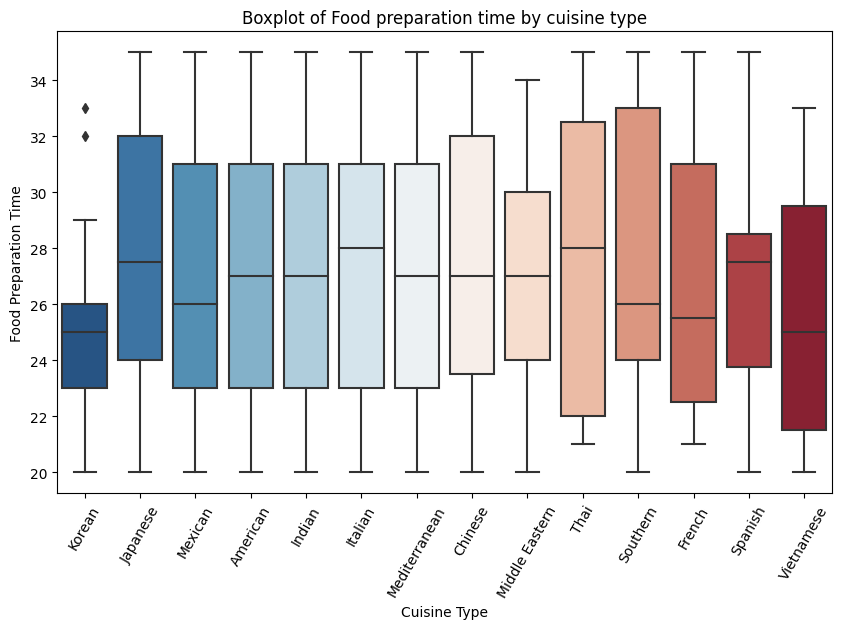

In [33]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(10,6))

#Creating Boxplot with food preparation time by cuisine time
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'RdBu_r')

# Set labels and title
plt.xticks(rotation = 60)
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')
plt.title('Boxplot of Food preparation time by cuisine type')
plt.show()

In [34]:
# checking mean and median of the food preparation time for cuisine types
print('Mean values\n',df.groupby('cuisine_type')['food_preparation_time'].mean().sort_values(ascending=False).round(2))
print('Median values\n',df.groupby('cuisine_type')['food_preparation_time'].median().sort_values(ascending=False).round(2))

Mean values
 cuisine_type
Southern          27.59
Chinese           27.51
Japanese          27.51
Italian           27.48
American          27.44
Thai              27.32
Indian            27.11
Mediterranean     27.00
Spanish           26.92
French            26.89
Mexican           26.73
Middle Eastern    26.67
Vietnamese        25.71
Korean            25.46
Name: food_preparation_time, dtype: float64
Median values
 cuisine_type
Italian           28.0
Thai              28.0
Japanese          27.5
Spanish           27.5
American          27.0
Chinese           27.0
Indian            27.0
Mediterranean     27.0
Middle Eastern    27.0
Mexican           26.0
Southern          26.0
French            25.5
Korean            25.0
Vietnamese        25.0
Name: food_preparation_time, dtype: float64


* **Popular cuisines have higher delivery time on average.**

**Day of the Week vs Delivery time**

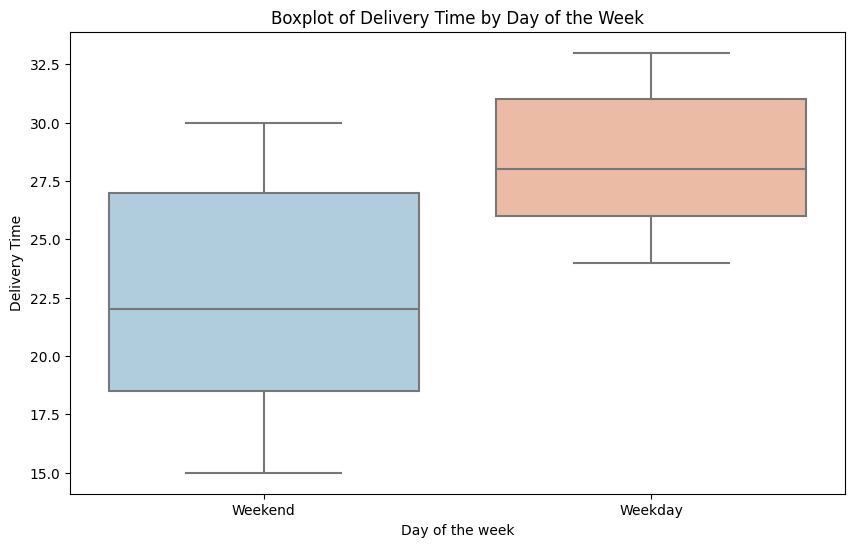

In [35]:
# Setting figure size
plt.figure(figsize=(10,6))

sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'RdBu_r')

# Setting labels and title
plt.xlabel('Day of the week')
plt.ylabel('Delivery Time')
plt.title('Boxplot of Delivery Time by Day of the Week')
plt.show()

In [36]:
# checking mean and median of the delivery time for day of the week

print('Mean values\n',df.groupby('day_of_the_week')['delivery_time'].mean().sort_values(ascending=False).round(2))
print('Median values\n',df.groupby('day_of_the_week')['delivery_time'].median().sort_values(ascending=False).round(2))

Mean values
 day_of_the_week
Weekday    28.34
Weekend    22.47
Name: delivery_time, dtype: float64
Median values
 day_of_the_week
Weekday    28.0
Weekend    22.0
Name: delivery_time, dtype: float64


* **Weekdays have a considerably greater mean delivery time (28.34) than weekends (22.47) as well as their median (28 on weekdays, 22 on weekends)**



**Rating vs Delivery time**

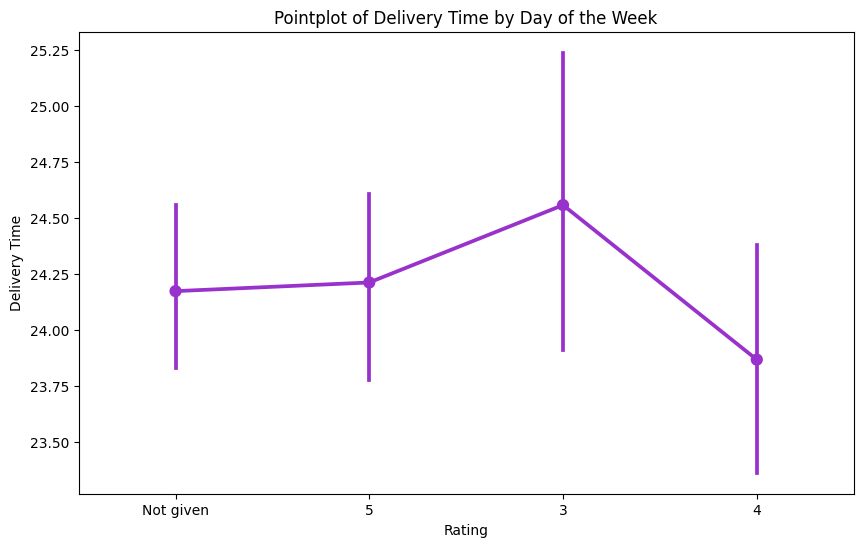

In [37]:
# Relationship between rating and delivery time
plt.figure(figsize=(10, 6))

# Creating pointplot
sns.pointplot(x = 'rating', y = 'delivery_time', data = df, color = 'darkorchid')

# Setting labels and titles
plt.xlabel('Rating')
plt.ylabel('Delivery Time')
plt.title('Pointplot of Delivery Time by Day of the Week')

plt.show()

In [38]:
# checking mean and median of the delivery time for rating
print('Mean values\n',df.groupby('rating')['delivery_time'].mean().sort_values(ascending=False).round(2))
print('Median values\n',df.groupby('rating')['delivery_time'].median().sort_values(ascending=False).round(2))

Mean values
 rating
3            24.56
5            24.21
Not given    24.17
4            23.87
Name: delivery_time, dtype: float64
Median values
 rating
3            25.0
5            25.0
Not given    25.0
4            24.0
Name: delivery_time, dtype: float64


* **For rating, typical delivery times are comparatively similar. Yet 'rating 3' has the highest average delivery time and 'rating 4' has the lowest average**

**Day of the week vs Cost of the Order**

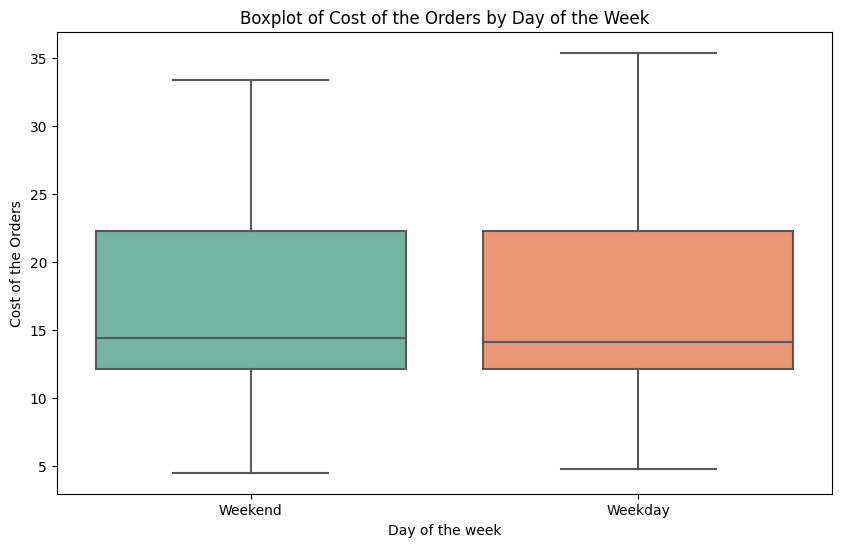

In [39]:
# setting figure size
plt.figure(figsize=(10,6))

#Creating boxplot by day of the week
sns.boxplot(x = "day_of_the_week", y = "cost_of_the_order", data = df, palette = 'Set2')

# Setting labels and titles
plt.xlabel('Day of the week')
plt.ylabel('Cost of the Orders')
plt.title('Boxplot of Cost of the Orders by Day of the Week')
plt.show()

In [40]:
#Finding mean and median cost of orders across weekday and weekends
print('Mean values\n',df.groupby('day_of_the_week')['cost_of_the_order'].mean().sort_values(ascending=False).round(2))
print('Median values\n',df.groupby('day_of_the_week')['cost_of_the_order'].median().sort_values(ascending=False).round(2))

Mean values
 day_of_the_week
Weekend    16.57
Weekday    16.31
Name: cost_of_the_order, dtype: float64
Median values
 day_of_the_week
Weekend    14.41
Weekday    14.07
Name: cost_of_the_order, dtype: float64


* **The cost of the orders' mean and median are relatively close to one another.**


**Rating vs Time from placing order to delivery**

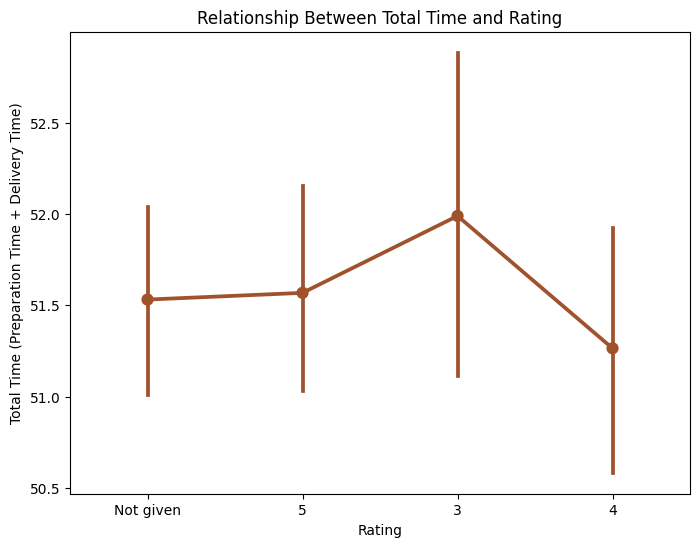

In [41]:
# Calculate the total time (food preparation time + delivery time)
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Set up the figure size
plt.figure(figsize=(8, 6))

# Create a scatter plot to visualize the relationship between rating and total time
sns.pointplot(data=df, x='rating', y='total_time', color = 'sienna')

# Customize plot labels and title
plt.ylabel('Total Time (Preparation Time + Delivery Time)')
plt.xlabel('Rating')
plt.title('Relationship Between Total Time and Rating')

# Show the plot
plt.show()

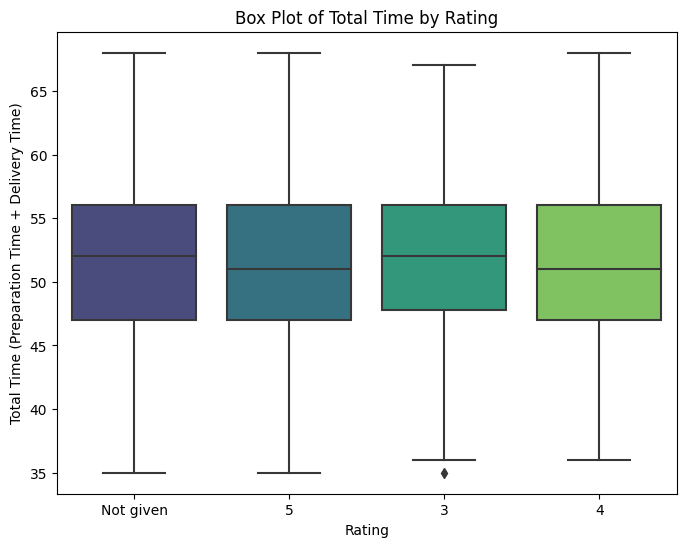

In [42]:
# Set up the figure size
plt.figure(figsize=(8, 6))

sns.boxplot(data=df, x='rating', y='total_time', palette = 'viridis')

plt.ylabel('Total Time (Preparation Time + Delivery Time)')
plt.xlabel('Rating')
plt.title('Box Plot of Total Time by Rating')

plt.show()

In [43]:
# Finding mean and median for total costs by rating
print('Mean values\n',df.groupby('rating')['total_time'].mean().sort_values(ascending=False).round(2))
print('Median values\n',df.groupby('rating')['total_time'].median().sort_values(ascending=False).round(2))

Mean values
 rating
3            51.99
5            51.57
Not given    51.53
4            51.26
Name: total_time, dtype: float64
Median values
 rating
3            52.0
Not given    52.0
4            51.0
5            51.0
Name: total_time, dtype: float64


**For rating, total times are comparatively similar. Yet 'rating 3' has the highest average delivery time and 'rating 4' has the lowest average**

**Rating vs Cost of the Order**

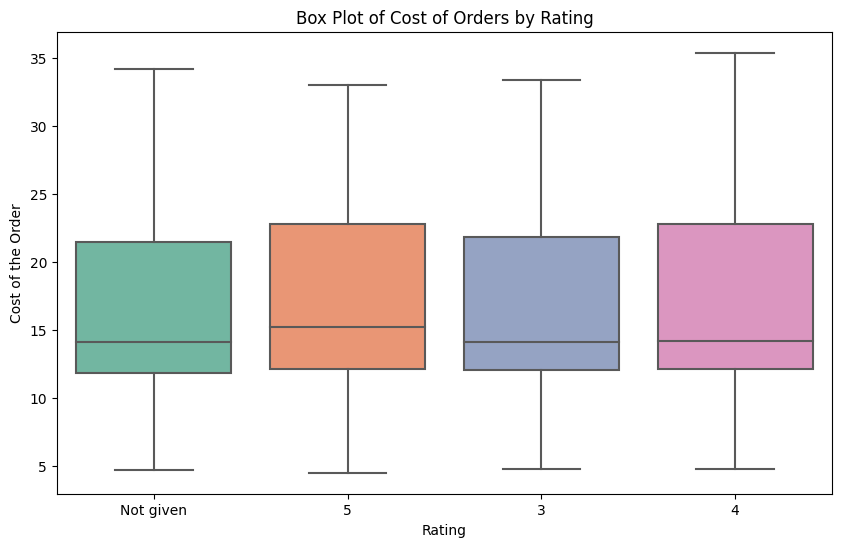

In [44]:
# Create a figure with the specified figure size
plt.figure(figsize=(10, 6))

# Create a boxplot to visualize the relationship between rating and cost of orders
sns.boxplot(x='rating', y='cost_of_the_order', data=df, palette='Set2')

# Customize plot labels and title for better readability
plt.xlabel('Rating')  # X-axis label
plt.ylabel('Cost of the Order')  # Y-axis label
plt.title('Box Plot of Cost of Orders by Rating')  # Plot title

# Show the plot
plt.show()

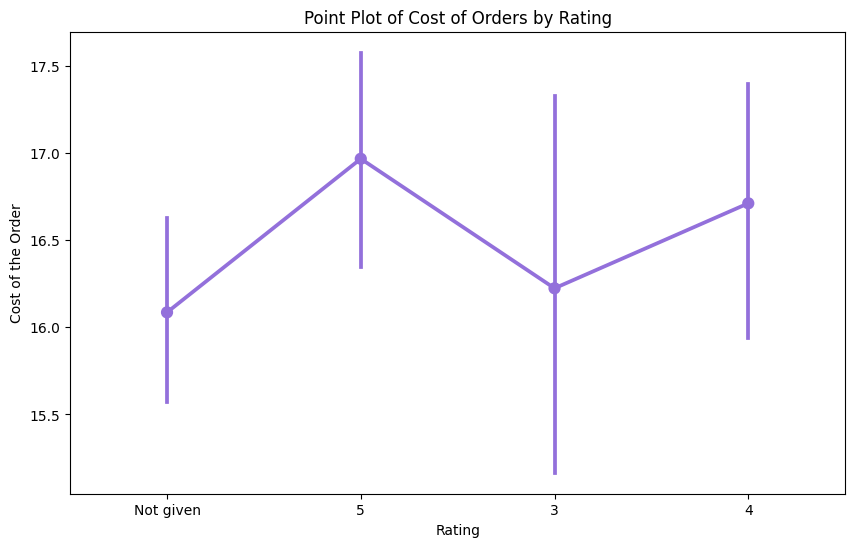

In [45]:
# Create a figure with the specified figure size
plt.figure(figsize=(10, 6))

# Create a pointplot to visualize the relationship between rating and cost of orders
sns.pointplot(data=df, x='rating', y='cost_of_the_order', color = 'mediumpurple')

# Customize plot labels and title for better readability
plt.xlabel('Rating')  # X-axis label
plt.ylabel('Cost of the Order')  # Y-axis label
plt.title('Point Plot of Cost of Orders by Rating')  # Plot title

# Show the plot
plt.show()

In [46]:
# Finding mean and median for cost of the order by rating

print('Mean values\n',df.groupby('rating')['cost_of_the_order'].mean().sort_values(ascending=False).round(2))
print('Median values\n',df.groupby('rating')['cost_of_the_order'].median().sort_values(ascending=False).round(2))

Mean values
 rating
5            16.97
4            16.71
3            16.22
Not given    16.09
Name: cost_of_the_order, dtype: float64
Median values
 rating
5            15.20
4            14.16
3            14.12
Not given    14.07
Name: cost_of_the_order, dtype: float64


* **The mean and median cost values are quite close in terms of rating.**

**Correlation among variables**

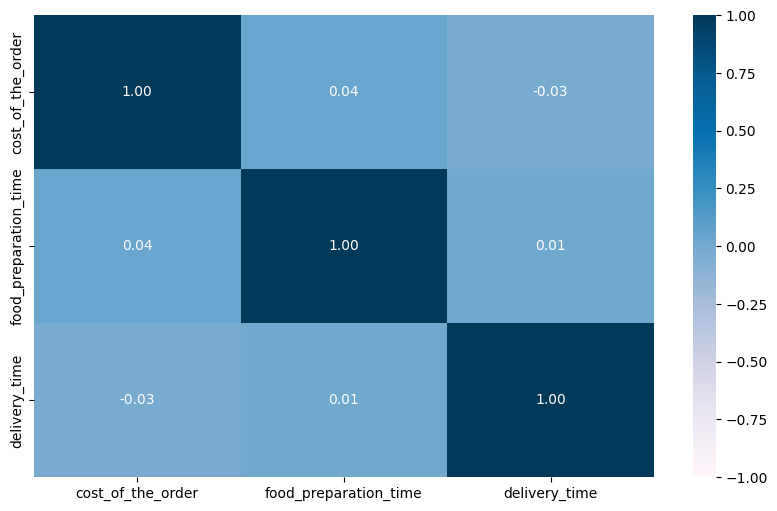

In [47]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(10, 6))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='PuBu')
plt.show()

* **The numerical variables barely have any correlation with one another.**

---



#### Observations:

**The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi are the restaurants that meet the criteria for the special offer.**



---



#### Observations:
**The company's net revenue from all orders is $6166.3 dollars.**



---



In [48]:
# adding food preparation time and delivery time to get total time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
time_above_60 = df[df['total_time'] > 60]   # Getting orders that took more than 60 minutes

# calculating percentage
percentage_above_60 = round(len(time_above_60) / len(df) *100, 2)
print('The percentage of orders over 60 minutes is' ,percentage_above_60)

The percentage of orders over 60 minutes is 10.54


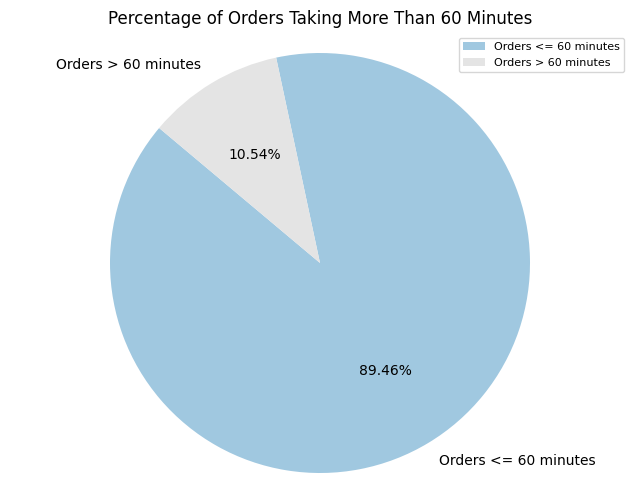

In [49]:
# Creating a pie chart to visualize the percentage
labels = ['Orders <= 60 minutes', 'Orders > 60 minutes']
sizes = [100 - percentage_above_60, percentage_above_60]
colors = ['#A0C8E0', '#E4E4E4']  # Defining colors for the chart

# Creating a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels,colors = colors, autopct='%1.2f%%', startangle=140)

# Add a title
plt.title('Percentage of Orders Taking More Than 60 Minutes')

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.legend(prop={'size': 8})
plt.show()

#### Observations:

**After the customer places an order, 10.54% of the orders take more than 60 minutes to deliver the food.**



---



In [50]:
#Finding mean delivery time for weekday and weekends
mean_delivery_weekday = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
mean_delivery_weekend = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

print('The average delivery time on weekdays is around', round(mean_delivery_weekday, 2), 'minutes')
print('The average delivery time on weekends is around', round(mean_delivery_weekend, 2), 'minutes')
print('Difference between average delivery time on weekdays and weekends is around', round(mean_delivery_weekday-mean_delivery_weekend, 2), 'minutes')

The average delivery time on weekdays is around 28.34 minutes
The average delivery time on weekends is around 22.47 minutes
Difference between average delivery time on weekdays and weekends is around 5.87 minutes


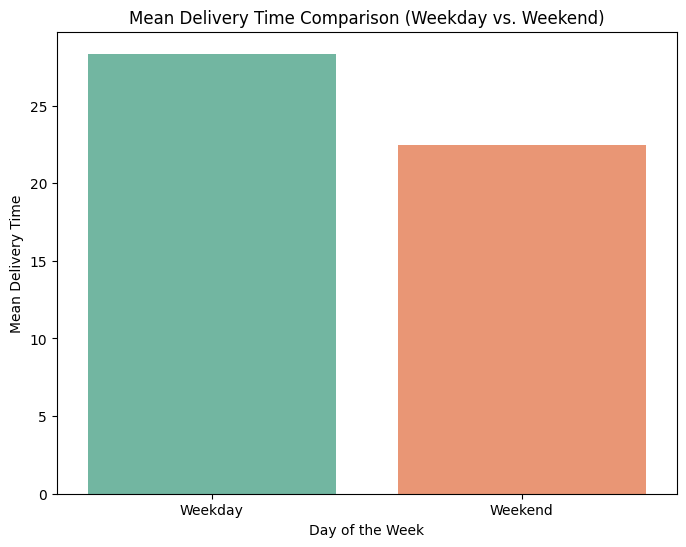

In [51]:
# Creating a DataFrame to store the means
mean_delivery_df = pd.DataFrame({'Day': ['Weekday', 'Weekend'],
                                 'Mean Delivery Time': [mean_delivery_weekday, mean_delivery_weekend]})

# Setting up the figure size
plt.figure(figsize=(8, 6))

# Create a bar plot to visualize the mean delivery times
sns.barplot(data=mean_delivery_df, x='Day', y='Mean Delivery Time', palette='Set2')

# Customize plot labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Mean Delivery Time')
plt.title('Mean Delivery Time Comparison (Weekday vs. Weekend)')

# Show the plot
plt.show()

#### Observations:

**The average delivery time for orders is 5.87 minutes longer on weekdays than on weekends.**


---




### Conclusion and Recommendations

# Conclusions:
*  The data set contains 9 columns and 1898 records representing orders from 1200 unique customers.

* We have five numerical features and four categorical features. The dataset doesn't have any missing data and there are no outliers in the numerical features.

* Order costs range from 4.47 dollars to 35.41 dollars, with a mean of 16.50 and a standard deviation of 7.48. The distribution is skewed towards right.

* Food preparation time range from 20 minutes to 35 minutes, with a mean of 27.37 and a standard deviation of 4.63. The distribution of the food preparation time is roughly uniform.

* Delivery time range from 15 minutes to 33 minutes, with a mean of 24.16 and a standard deviation of 4.97. The delivery time column distribution is skewed to the left.


* The majority of customares (38.78%) did not provide rating. 30.98% customers given a 5-star rating, followed by 9.91% and 20.34% for 3 and 4 stars, respectively.

* Orders came from 148 unique restaurants serving 14 different cuisines.

* The majority of clients ordered items from the following cuisines, accounting for 82.56% of all orders: American (30.77%), Japanese (24.76%), Italian (15.70%), and Chinese (11.33%).Additionally, these four cuisines—American (30.44%), Japanese (24.47%), Italian (15.62%), and Chinese (11.19%)—contributed 81.72% of the total revenue generated.

* People are much more likely to order meals online on the weekends than on weekdays, as indicated by the fact that 71.18% of orders were placed on the weekends compared to 28.82% on weekdays.

* The majority of customares (38.78%) did not provide rating. 30.98% customers given a 5-star rating, followed by 9.91% and 20.34% for 3 and 4 stars, respectively.

* Top five resturants in terms of receiving orders with percentage : Shake Shack (11.54%),  The Meatball Shop(6.95%), Blue Ribbon Sushi(6.27%), Blue Ribbon Fried Chicken (5.06%), Parm has (3.58%).

* The average number of orders was lower for the cuisines with higher order costs and vice-versa.

* Weekdays have a considerably greater mean delivery time (28.34) than weekends (22.47) as well as their median (28 on weekdays, 22 on weekends)

# Recommendations:

* **Encourage Customers to give Ratings/Feedback:**
Apply strategies to get more ratings from individuals. For instance, specific reward points for rating items. Positive reviews can boost the reputation of the restaurant and attract more customers. In addtion, It will provide a better understanding of the orders.

* **Promotional offers :**
Offering promotional deals from restaurants with poor sales can boost sales.

* **Weekday Promotions :**
Running special promotional campaigns on weekdays can boost sales because individuals often place fewer orders on such days. Specifically, run the campaigns focusing popular cuisines on weekdays.

* **Improve Delivery Time :**
On weekdays, concentrate on reducing delivery times. Find the main causes of delivery taking longer throughout the week than on the weekend and then take necessary steps. e.g. Perhaps the delivery person doesn't think it's worthwhile to make deliveries during the workdays and that's causing lack of delivery persons which ultimately causes the delay. Maybe a third party delivery service can resolve this issue.

* **Imply Loyalty programs :**
Implement loyalty programs, special offers, or other incentives for returning customers. To keep them coming back, interact with your customers through customized campaigns.

* **Reconstruct menus:**
Try looking through their menu to see if it's expensive because the cuisines with the highest order costs have the fewest orders overall.Try offering discounts on those cuisines to see if the high price is the issue or if people simply don't like them. Or maybe some resturant has a minimum order cost requirement which are causing customer dissatisfaction.

* **Monitor changes based on data :** Try to measure the change after implementing solutions to see whether they are truly effective. Hypotheses testing(e.g. t-test,chi-squared test, ANOVA test etc.) can be a useful way to evaluate differences.


